In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import geopandas as gpd
import seaborn as sns
from haversine import haversine, Unit
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from folium import folium, Marker
import warnings
from sklearn import preprocessing, cluster
import contextily as ctx
from fcmeans import FCM
import geopandas as gpd
import matplotlib as mpl
import hdbscan
import matplotlib.colors as mcolors
from termcolor import colored
warnings.filterwarnings("ignore")

#show all columns 
pd.set_option('display.max_columns', None)

In [2]:
#read in cleaned dataframe
df = pd.read_parquet("../data/df_cleaned_09_08_2021.parquet")

In [3]:
#reducing dataframe
def sampleFile(sample_size,df):
    df_new = df.sample(frac = (sample_size/100),random_state=42)
    return df_new

df_all= df.copy()
df = sampleFile(10,df)
print("New length of dataframe: ",len(df))

New length of dataframe:  391995


In [27]:
def clustering_gmm(ncluster, df, xAxis, yAxis, name):

    gmm = KMeans(ncluster)
    gmm.fit(df)

    #predictions from gmm
    labels = gmm.predict(df)
    frame = pd.DataFrame(df)
    frame['cluster'] = labels
    centroids=gmm.cluster_centers_
    #df['Cluster']=labels
    #frame.columns = [xAxis, yAxis, 'cluster']


    color=['red','blue','green']
    cmap = mcolors.ListedColormap(["grey", "blue", "yellow", "green", "red"])

    plot_df = gpd.GeoDataFrame(
    frame.drop([xAxis,yAxis],axis=1), geometry=gpd.points_from_xy(frame[xAxis], frame[yAxis]))

    ax = plot_df.plot(figsize=(10,10))
    plot_df.plot(ax = ax, marker = 'o',column = 'cluster',categorical=True,markersize=100, edgecolor = 'k',legend = True,cmap=cmap)
    ctx.add_basemap(ax=ax,zoom=12,crs=4326)
    
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.title(name)
    
    return centroids

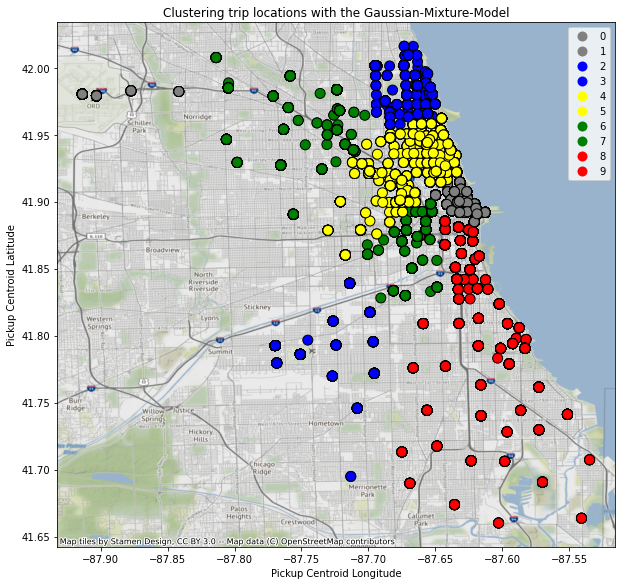

In [29]:
dfgeo = df[['Pickup Centroid Latitude','Pickup Centroid Longitude']]

dfgeo = dfgeo[dfgeo['Pickup Centroid Latitude'].notna()]
dfgeo = dfgeo[dfgeo['Pickup Centroid Longitude'].notna()]

centroids = clustering_gmm(10, dfgeo, 'Pickup Centroid Longitude', 'Pickup Centroid Latitude', 'Clustering trip locations with the Gaussian-Mixture-Model')

In [30]:
centroids

array([[ 41.89414044, -87.62662572],
       [ 41.97935747, -87.90551376],
       [ 41.78802248, -87.75394984],
       [ 41.98265806, -87.66849653],
       [ 41.9068497 , -87.68378296],
       [ 41.93701456, -87.65287706],
       [ 41.95788197, -87.73966653],
       [ 41.87832404, -87.66117293],
       [ 41.78292032, -87.60054889],
       [ 41.87738626, -87.63172914]])

In [34]:
centroids[0]

array([ 41.89414044, -87.62662572])